<a href="https://colab.research.google.com/github/JozueDev/Proyecto-de-Regresi-n-Log-stica/blob/main/src/explore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explore here

In [44]:
# 1. Importar librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

In [71]:
# 2. Cargar el dataset
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv', sep = ";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [96]:
df.rename(columns={'y': 'target'}, inplace=True)



In [97]:
# 3. Exploración inicial
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
target            0
dtype: int64

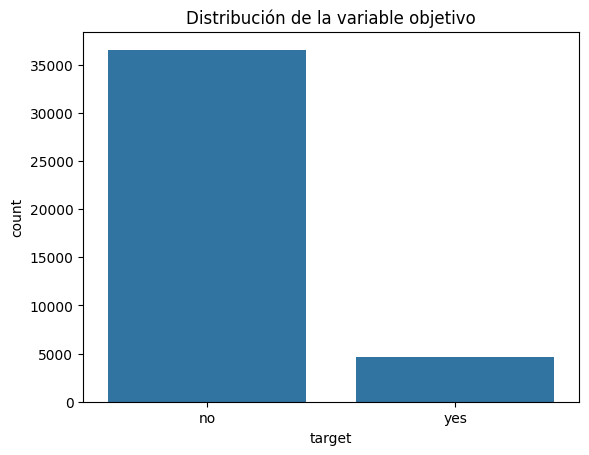

target
no     0.887346
yes    0.112654
Name: proportion, dtype: float64

In [98]:
# 4. Análisis de la variable objetivo (binaria)
sns.countplot(x='target', data=df)
plt.title('Distribución de la variable objetivo')
plt.show()
df['target'].value_counts(normalize=True)

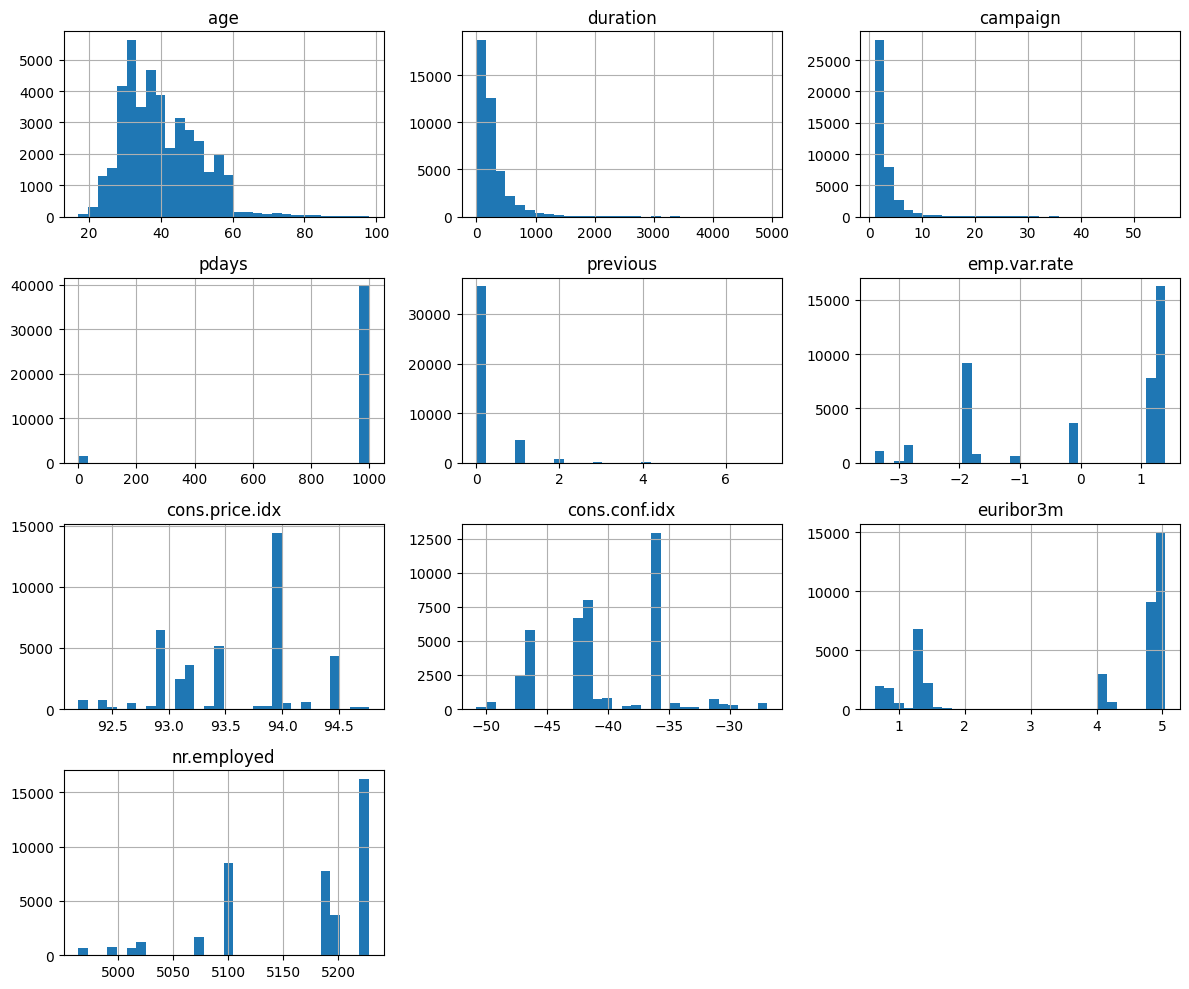

In [99]:
# 5. Análisis univariado de variables numéricas
df[['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']].hist(bins=30, figsize=(12, 10))
plt.tight_layout()
plt.show()

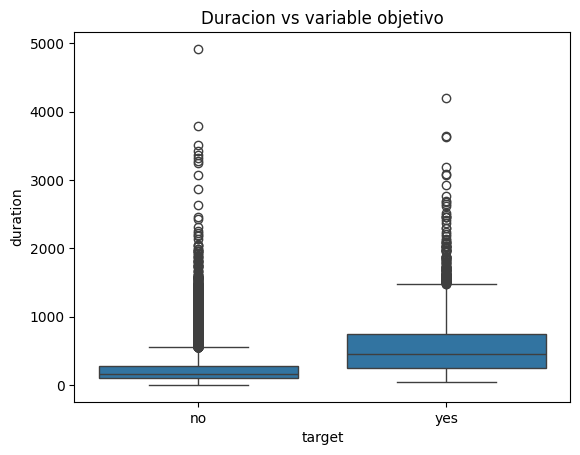

In [100]:
# 6. Análisis bivariado: Numérica vs Target
sns.boxplot(x='target', y='duration', data=df)
plt.title('Duracion vs variable objetivo')
plt.show()

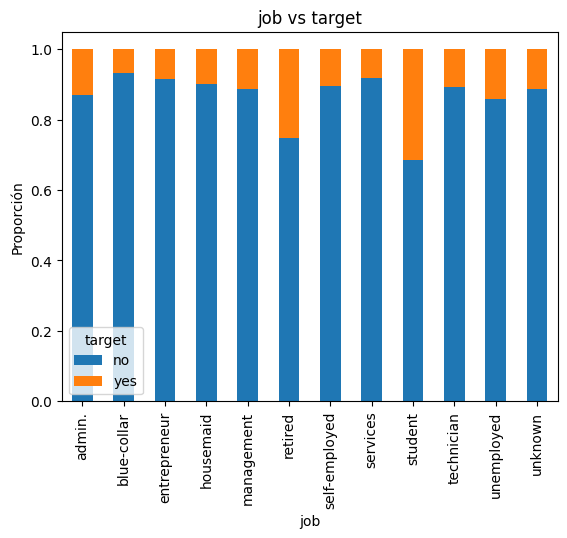

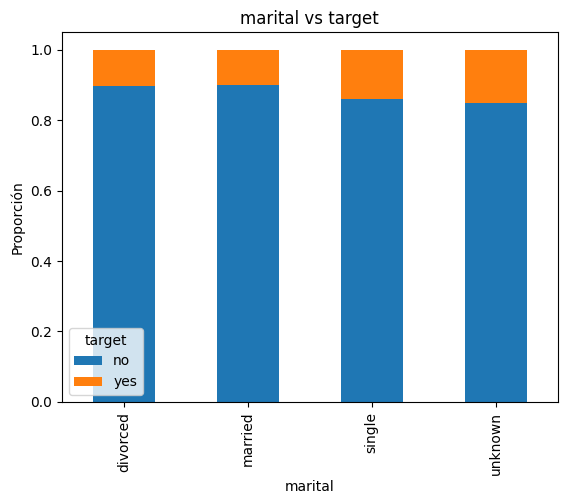

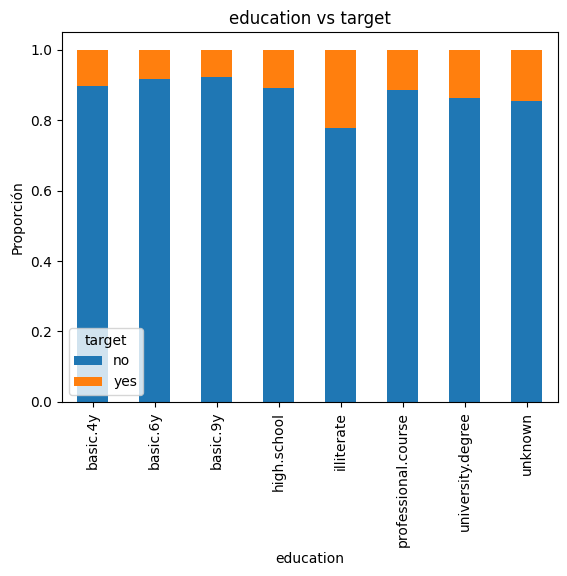

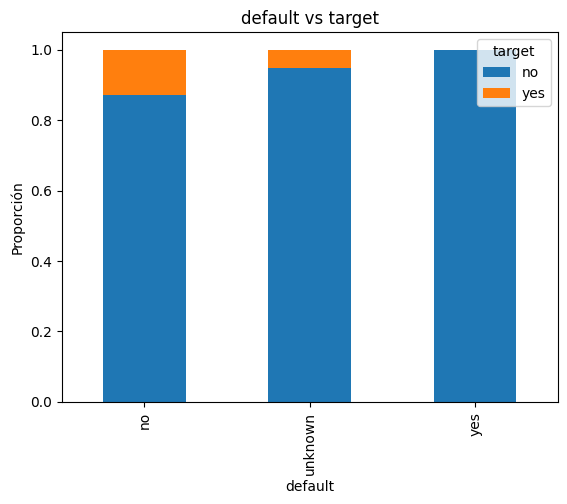

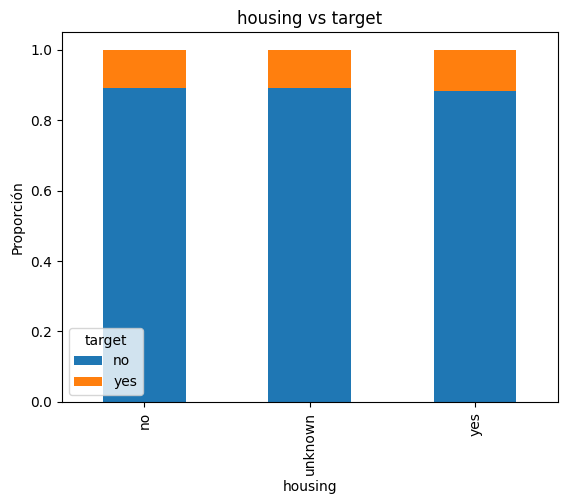

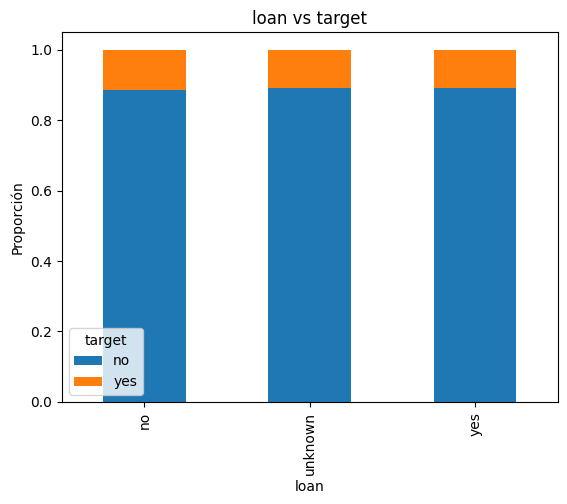

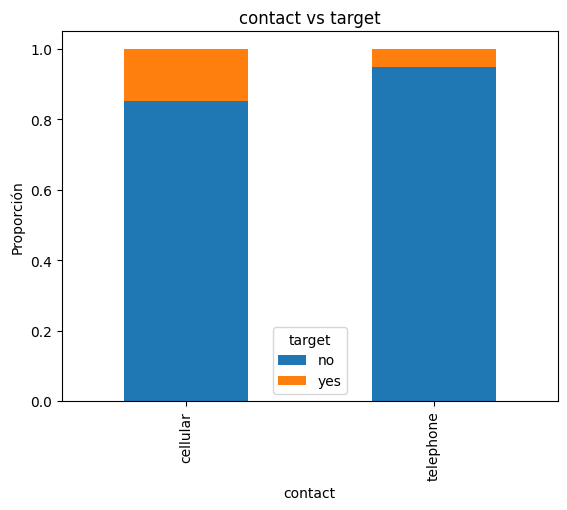

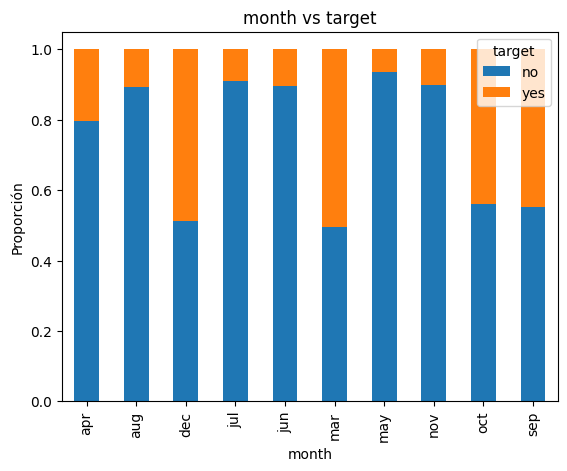

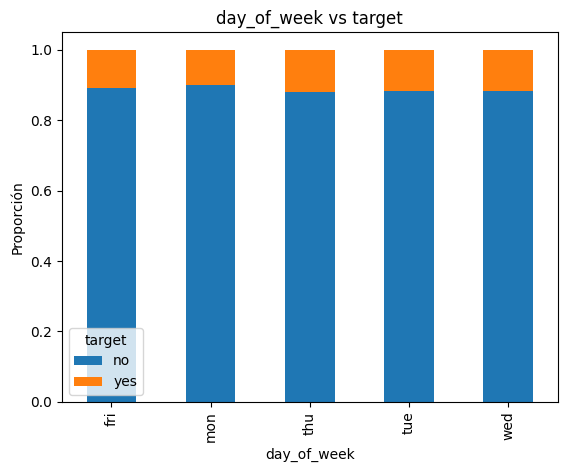

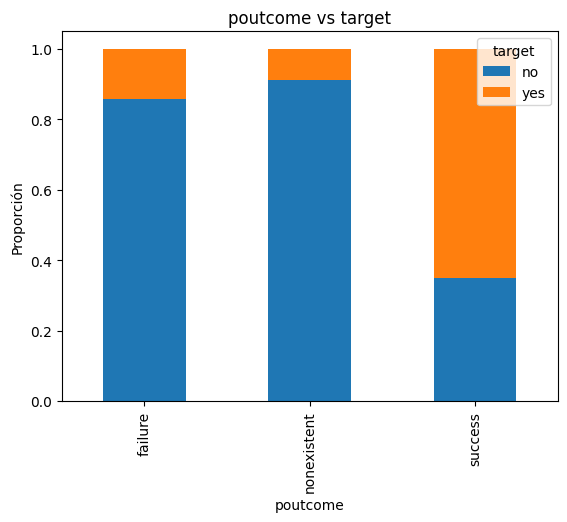

In [101]:
# 7. Análisis bivariado: Categórica vs Target
cat_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
for var in cat_vars:
    ct = pd.crosstab(df[var], df['target'], normalize='index')
    ct.plot(kind='bar', stacked=True, title=f'{var} vs target')
    plt.ylabel('Proporción')
    plt.show()

In [103]:
# 8. Codificación de variables categóricas
df_encoded = pd.get_dummies(df, drop_first=True)
# Convertir target a binaria
df_encoded['target'] = df_encoded['target'].map({'yes': 1, 'no': 0})

KeyError: 'target'

In [82]:
# 9. Correlación
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr()[['y']].sort_values(by='y', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlación con la variable objetivo')
plt.show()

KeyError: "None of [Index(['y'], dtype='object')] are in the [columns]"

<Figure size 1200x800 with 0 Axes>

In [83]:
# 10. Escalado de variables numéricas
scaler = StandardScaler()
cols_to_scale = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
df_encoded[cols_to_scale] = scaler.fit_transform(df_encoded[cols_to_scale])


In [84]:
# 11. Separar variables y entrenar modelo
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

KeyError: "['y'] not found in axis"

In [ ]:
# 12. Evaluación del modelo
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))